list of simulations:
- ```downramp_250MeV/030_downramp_bachelor1```   (Energy 250 MeV, normal divergence, downramp)
- ```highdiv_250MeV/030_highdiv_bachelor1```     (Energy 250 MeV, high divergence (14.5 mrad))
- ```square_250MeV/030_square_bachelor1```       (Energy 250 MeV, normal divergence, uniform y-distribution)
- ```particles_250MeV/034_particles_bachelor1``` (Energy 250 MeV, small divergence)
- ```particles_250MeV/035_particles_bachelor1``` (Energy 250 MeV, normal divergence)
- ```particles_300MeV/040_particles_bachelor1``` (Energy 300 MeV, normal divergence)
- ```particles_350MeV/042_particles_bachelor1``` (Energy 350 MeV, normal divergence)

In [2]:
%matplotlib inline
import matplotlib
from matplotlib.transforms import Bbox
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
#    'font.family': 'sans-serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import numpy as np
from scipy import constants

from scipy import stats
from time import time

## Electron density

In [2]:
BASE_DENSITY_SI = 4e24
DELTA_T_SI = 1.706e-16/1.28631
CELL_WIDTH_SI = 0.5 * 0.1772e-6
start_pos = (10191 * 1.02) * DELTA_T_SI * constants.c
end_pos = (60000) * DELTA_T_SI * constants.c - start_pos
sigma = 200e-7
peak_start = 6 * sigma
peak_end = peak_start + end_pos


x_start = 0 * DELTA_T_SI * constants.c
x_end = 30000 * DELTA_T_SI * constants.c
x = np.linspace(x_start, x_end, 30000)
y = x - start_pos - 2048 * CELL_WIDTH_SI

density1 = np.zeros_like(y[y<=0])*BASE_DENSITY_SI*1e-6
density2 = np.exp(-((y[(y>0)&(y<=peak_start)] - peak_start) / sigma) ** 6)*BASE_DENSITY_SI*1e-6
density3 = np.ones_like(y[(y>peak_start)&(y<=end_pos)])*BASE_DENSITY_SI*1e-6
density4 = np.exp(-((y[(y>end_pos)&(y<=peak_end)] - end_pos) / sigma) ** 6)*BASE_DENSITY_SI*1e-6
density5 = np.zeros_like(y[y>peak_end])*BASE_DENSITY_SI*1e-6

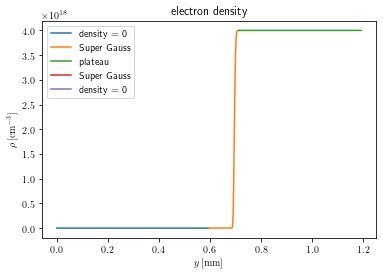

In [3]:
plt.plot(x[y<=0]*1e3, density1, label="density = 0")
plt.plot(x[(y>0)&(y<=peak_start)]*1e3, density2, label="Super Gauss")
plt.plot(x[(y>peak_start)&(y<=end_pos)]*1e3, density3, label="plateau")
plt.plot(x[(y>end_pos)&(y<=peak_end)]*1e3, density4, label="Super Gauss")
plt.plot(x[y>peak_end]*1e3, density5, label="density = 0")



plt.xlabel("$y \, \mathrm{[mm]}$")
plt.ylabel("$\\rho \, \mathrm{[{cm}^{-3}]}$")
plt.title("electron density")
plt.legend()
plt.show()
#plt.savefig(fname="../images/e_density.pgf")

In [ ]:
peak_start*1e3
test = np.linspace(0, 10, 11)
test[0:4] = 3
print(test)

In [ ]:
2048/8 * 7

In [ ]:
plt.plot(x*1e3, density)
plt.xlabel("$y \, \mathrm{[\mu m]}$")
plt.ylabel("$density \, \mathrm{[m^{-3}]}$")
plt.title("electron density")
plt.show()

In [ ]:
1.706e-16/1.28631

In [ ]:
constants.c**2 * constants.electron_mass / constants.e *1e-6

In [ ]:
2*np.sqrt(2*np.log(2))

In [ ]:
Q = 400e-12
mean_weight = 5000
50000 * Q / constants.elementary_charge / mean_weight

In [ ]:
M = 4

In [ ]:
g = 16**(1-M) / M * (np.math.factorial(2*M - 1) / np.math.factorial(M - 1)**2)**2
print("{:1.7e}".format(g))

for l in np.arange(1.5, M-0.4):
    g = -1 * (l-1)**2 / l**2 * (2*M + 1 - 2*l) / (2*M - 1 + 2*l) * g
    print("{:1.7e}".format(g))

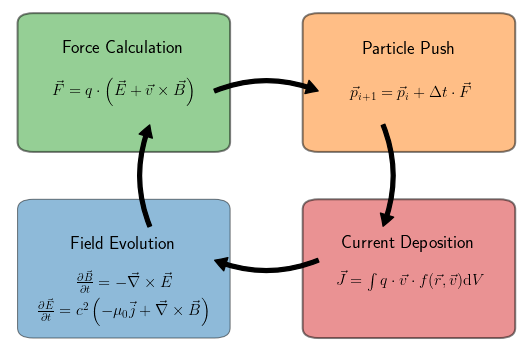

In [7]:
plt.figure(figsize=(7.5,5))


ax = plt.subplot()

plt.xlim(0, 10)
plt.ylim(0,10)

plt.axis('off')

box_hight = 3.5
box_length = box_hight

delta_x = 0.5
delta_y = delta_x

fancybox = mpatches.FancyBboxPatch(
    [delta_x, delta_x], box_length, box_hight,
    boxstyle='round', facecolor='C0', alpha=0.5)

ax.add_patch(fancybox)


fancybox = mpatches.FancyBboxPatch(
    [10.0 - box_length - delta_x, 10.0 - box_hight - delta_y], box_length, box_hight,
    boxstyle='round', facecolor='C1', alpha=0.5, lw=2, ec="k")

ax.add_patch(fancybox)

fancybox = mpatches.FancyBboxPatch(
    [delta_x, 10.0 - box_hight - delta_y], box_length, box_hight,
    boxstyle='round', facecolor='C2', alpha=0.5, lw=2, ec="k")

ax.add_patch(fancybox)

fancybox = mpatches.FancyBboxPatch(
    [10.0 - box_length - delta_x, delta_y], box_length, box_hight,
    boxstyle='round', facecolor='C3', alpha=0.5, lw=2, ec="k")

ax.add_patch(fancybox)


#fancyarrow = mpatches.FancyArrowPatch(posA=[7.5, 6.0], posB=[7.5, 4.0], arrowstyle="simple", lw=6)
#ax.add_patch(fancyarrow)


ax.annotate("", (7.25, 3.5),
                (7.25, 6.5),
                arrowprops=dict(headwidth = 14, fc="k", ec="k", lw=1.2, connectionstyle="arc3,rad=-0.2", shrinkA=1, shrinkB=20))



ax.annotate("", (2.75, 6.5),
                (2.75, 3.5),
                arrowprops=dict(headwidth = 14, fc="k", ec="k", lw=1.2, connectionstyle="arc3,rad=-0.2", shrinkA=1, shrinkB=20))


ax.annotate("", (4.0, 2.5),
                (6.0, 2.5),
                arrowprops=dict(headwidth = 14, fc="k", ec="k", lw=1.2, connectionstyle="arc3,rad=-0.2", shrinkA=1, shrinkB=20))
                #arrowprops=dict(arrowstyle="fancy",
                #                shrinkA=2,
                #                shrinkB=2,
                #                fc="k", ec="k", lw=2, 
                #                connectionstyle="arc3,rad=-0.2",
                #                ))



t = ax.annotate("", (6.0, 7.5),
                (4.0, 7.5),
                arrowprops=dict(headwidth = 14, fc="k", ec="k", lw=1.2, connectionstyle="arc3,rad=-0.2", shrinkA=1, shrinkB=20))

    


ax.text(2.25, 8.75, "Force Calculation", fontsize=18, fontweight='bold',
       verticalalignment='center', horizontalalignment='center')

ax.text(7.75, 8.75, "Particle Push", fontsize=18, fontweight='bold',
       verticalalignment='center', horizontalalignment='center')

ax.text(7.75, 3.0, "Current Deposition", fontsize=18, fontweight='bold',
       verticalalignment='center', horizontalalignment='center')

ax.text(2.25, 3.0, "Field Evolution", fontsize=18, fontweight='bold',
       verticalalignment='center', horizontalalignment='center')


ax.text(2.25, 7.5, r"$\vec{F} = q \cdot \left( \vec{E} + \vec{v} \times \vec{B} \right)$", fontsize=16,
       verticalalignment='center', horizontalalignment='center')

ax.text(7.75, 7.5, r"$\vec{p}_{i+1} = \vec{p}_{i} + \Delta t \cdot \vec{F} $", fontsize=16,
       verticalalignment='center', horizontalalignment='center')

ax.text(7.75, 1.9, r"$\vec J = \int q \cdot \vec{v} \cdot f(\vec{r}, \vec{v}) \mathrm{d} V$", fontsize=16,
       verticalalignment='center', horizontalalignment='center')

ax.text(2.25 , 1.0, r"$ \frac{\partial \vec{E}}{\partial t}= c^2 \left( - \mu_0 \vec{j} + \vec{\nabla} \times \vec{B} \right)$", fontsize=16,
       verticalalignment='center', horizontalalignment='center')

ax.text(2.25 , 1.9, r"$ \frac{\partial \vec{B}}{\partial t}= - \vec{\nabla} \times \vec{E} $", fontsize=16,
       verticalalignment='center', horizontalalignment='center')

plt.tight_layout()
#plt.savefig("PIC_cycle.pdf")
plt.show()

In [13]:
np.arctan2(1,-2)

2.677945044588987